---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Bionomial distribution is scenario that has two possible outcomes
np.random.binomial(1, 0.5)

1

In [3]:
np.random.binomial(1000, 0.5)/1000

0.502

In [29]:
## Simulate the probability of flipping a fair coin 20 times and getting a number greater than equal to 15. Using
## np.random.binomial(n,p,size) to do 10000 simulations of flipping a fair coin 20 times, seeing waht the proportion
## of the simulations are 15 or greater

flips = np.random.binomial(20, .5, 10000)
flip_proportion = sum(flips >= 15) / 10000
#flip_proportion = (flips >= 15).mean() #alernative means of measure
flip_proportion

0.0218

In [30]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

12

In [31]:
## Simulating the likelihood of tornado hitting on back to back days based on fictitious .01 probability of tornado,
## over the course of one million days.

chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000) #size paramter is day in this scenario

## First create an empty counter for back to back occurences. 
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

110 tornadoes back to back in 2739.72602739726 years


In [47]:
## Many of the distributions you use in data science are not discrete binomial, and instead are continuous, where 
## the value of the given observation isn't a category like heads or tails, but can be represented as a real number. 
## It's common to then graph these distributions when talking about them, where the x axis is the value of the 
## observation and the y axis represents the probability that a given observation will occur. 

np.random.uniform(0, 10)

6.551826912148452

In [33]:
## Normal distribution which is also called the Gaussian Distribution or sometimes, a Bell Curve. 

np.random.normal(0.75) 
# Parameters: loc(float) - mean ('center') of the distribution, scale(float) - standard deviation (spread or 'width'
# of the distribution,  size(optional) 

-1.2799999748822892

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [50]:
distribution = np.random.normal(0.75,size=1000)

## Standard Deviation
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.98161135068178484

In [49]:
## Numpy function for standard deviation

np.std(distribution)

1.024539246699127

In [51]:
## There's a couple more measures of distributions that are interesting to talk about. One of these is the shape of 
## the tales of the distribution and this is called the kurtosis. We can measure the kurtosis using the statistics 
## functions in the SciPy package. A negative value means the curve is slightly more flat than a normal distribution, 
## and a positive value means the curve is slightly more peaky than a normal distribution. Remember that we aren't 
## measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the 
## distribution. This is a subtle but important distinction. 

import scipy.stats as stats
stats.kurtosis(distribution)

-0.015707234570164985

In [53]:
## Skew
stats.skew(distribution)

-0.050878977431299946

In [38]:
## Chi Squared distribution, which is also quite commonly used in statistics. The Chi Squared Distribution has only 
## one parameter called the degrees of freedom. The degrees of freedom is closely related to the number of samples 
## that you take from a normal population, and it's important for significance testing. But what I would like you to 
## observe, is that as the degrees of freedom increases, the shape of the Chi Squared distribution changes. In 
## particular, the skew to the left begins to move towards the center. We can observe this through simulation. 

chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

## The Chi-square test is intended to test how likely it is that an observed distribution is due to chance. It is 
## also called a "goodness of fit" statistic, because it measures how well the observed distribution of data fits 
## with the distribution that is expected if the variables are independent.

2.0443867446891772

In [54]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2481324626647738

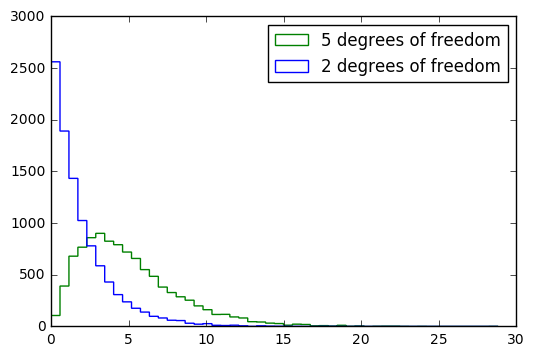

In [55]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [56]:
df = pd.read_csv('grades.csv')

In [57]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [ ]:
len(df)

In [58]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [59]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [60]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [ ]:
## When doing hypothesis testing, we have to choose a significance level as a threshold for how much of a chance we're 
## willing to accept. This significance level is typically called alpha. It can vary greatly, depending on what you're
## going to do with the result and the amount of noise you expect in your data. 

## In social sciences research, a value of 0.05 or 0.01 is often used, which indicates a tolerance for a probability 
## of between 5% and 1% of chance. In a physics experiment where the conditions are much more controlled and thus, 
## the burden of proof is much higher, you might expect to see alpha levels of 10 to the negative 5 or 100,000th of a 
## percentage.

## The threshold you set for alpha depends on what you might do with the result, as well. For this example, let's use 
## a threshold of 0.05 for our alpha or 5%. Now, how do we actually test whether these means are different in Python? 
## The SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing in 
## Python. A t-test is one way to compare the means of two different populations. In the SciPy library, the ttest_ind 
## function will compare two independent samples to see if they have different means.


In [61]:
from scipy import stats
stats.ttest_ind?

In [62]:
## Tompare the assignment grades for the first assignment between the two populations: generate a t-test by passing 
## these two series into the ttest_ind function.

stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

## result is a tuple with a test statistic and a p-value. The p-value here is much larger than our 0.05. So we cannot 
## reject the null hypothesis, which is that the two populations are the same. In more lay terms, we would say that 
## there's no statistically significant difference between these two sample means.

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [63]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [64]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

In [ ]:
## TTest for student assignment grades still beyond threshold value. At this point, important to stop here and think 
## about serious process problem with how this investigation of the difference between these populations is being 
## handled. With alpha set to 0.05, we expect that there will be a positive result, 5% of the time just due to chance.
## As more ttests are run, it is more likely a positive result will be found just because of the number of test run.

## When a data scientist runs many tests in this way, it's called p-hacking or dredging and it's a serious 
## methodological issue. P-hacking results in spurious correlations instead of generalizable results. There are a 
## couple of different ways you can deal with p-hacking. The first is called the Bonferroni correction. In this case, 
## you simply tighten your alpha value, the threshold of significance, based on the number of tests you're running. 
## So if you choose 0.05 with 1 test, and you want to run 3 tests, you reduce alpha by multiplying 0.05 by one-third 
## to get a new value of 0.017. I personally find this approach to be very conservative. Another option is to hold out 
## some of your data for testing to see how generalizable your result is. In this case, we might take half of our data 
## for each of the two DataFrames, run our t-test with that, form specific hypothesis based on the result of these 
## tests, then run very limited tests on the rest of the data. This method is actually heavily used in machine 
## learning when building predictive models, where it's called cross fold validation and you'll learn more about this 
## in third course in this specialization. 